In [22]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.offsetbox import AnchoredText
from helpers_plot import initPlot, finalizePlot
initPlot(titlesize=20)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm, SymLogNorm
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as mcb
import matplotlib.cm as cm

In [23]:
# Load data
cov_type = "cosmicShear"#"shapenoise" # Can be 'slics' or 'shapenoise' or 'cosmicShear' cov
sigma = 0.3
n = 4096*4096/10/10
thetaMax = 8.93
thetaRound=5.04

if (cov_type == 'slics'):
    folder = "/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"
    cov_term2Numerical = np.loadtxt(folder+f'cov_slics_term2Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_infiniteField = np.loadtxt(folder+f'cov_slics_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_fft = np.loadtxt(folder+f'cov_slics_fft_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')*0.775 #Factor, is because 4*32 arcmin was cut off, not 4*16 arcmin
    cov_infiniteFieldNG = np.loadtxt(folder+f'cov_slics_infiniteFieldNG_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')

elif (cov_type == 'shapenoise'):
    folder = "/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields_shapenoise/"
    cov_term1Analytical = np.loadtxt(folder+f'cov_shapenoise_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_term2Analytical = np.loadtxt(folder+f'cov_shapenoise_term2Analytical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_term1Numerical = np.loadtxt(folder+f'cov_shapenoise_term1Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')*1.1

    cov_term2Numerical = np.loadtxt(folder+f'cov_shapenoise_term2Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_infiniteField = np.loadtxt(folder+f'cov_shapenoise_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_fft = np.loadtxt(folder+f'cov_shapenoise_fft_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')*0.775 #Factor is because 4*32 arcmin was cut off, not 4*16 arcmin
    cov_term2Round = np.loadtxt(folder+f'cov_shapenoise_term2NumericalRound_sigma_{sigma}_n_{n}_thetaMax_{thetaRound}.dat')
    cov_term1Round = np.loadtxt(folder+f'cov_shapenoise_term1NumericalRound_sigma_{sigma}_n_{n}_thetaMax_{thetaRound}.dat')
elif (cov_type == 'cosmicShear'):
    folder = "/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields_cosmicShear/"
    cov_term1Numerical = np.loadtxt(folder+f'cov_cosmicShear_term1Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_term2Numerical = np.loadtxt(folder+f'cov_cosmicShear_term2Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_infiniteField = np.loadtxt(folder+f'cov_cosmicShear_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    cov_fft = np.loadtxt(folder+f'cov_cosmicShear_fft_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    #cov_term2Round = np.loadtxt(folder+f'cov_cosmicShear_term2NumericalRound_sigma_{sigma}_n_{n}_thetaMax_{thetaRound}.dat')
    #cov_term1Round = np.loadtxt(folder+f'cov_cosmicShear_term1NumericalRound_sigma_{sigma}_n_{n}_thetaMax_{thetaRound}.dat')
else:
    print("Cov type not specified")

In [24]:
# Labels
thetas_ind=np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                        [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8], 
                        [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8], 
                        [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16], 
                        [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16] ])
thetas_labels=[]
for thetas in thetas_ind:
    thetas_labels.append(f"({thetas[0]}', {thetas[1]}', {thetas[2]}')")
N=len(thetas_ind)
thetas_ticks=np.arange(0, N)

<Figure size 432x288 with 0 Axes>

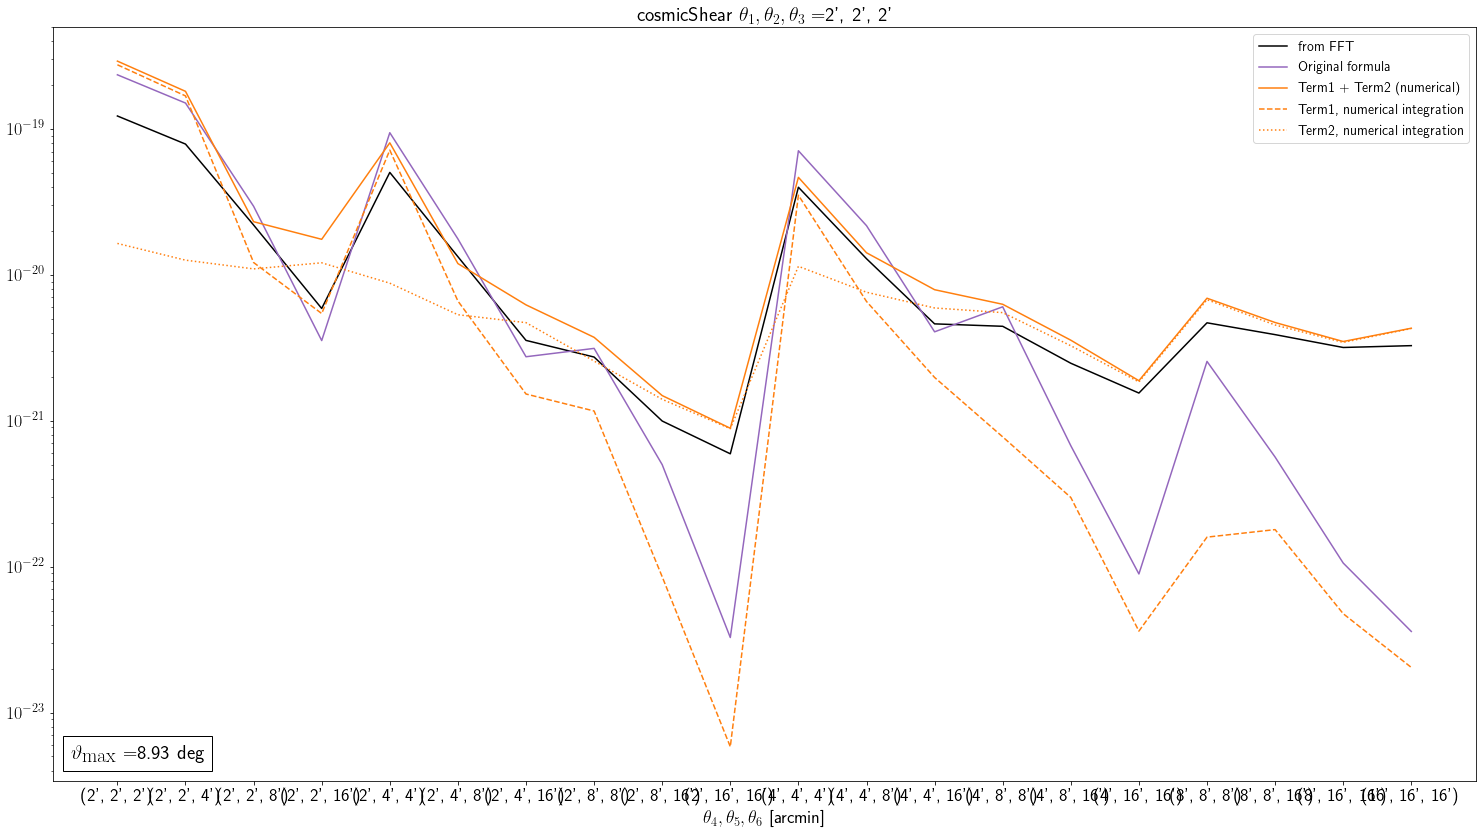

<Figure size 432x288 with 0 Axes>

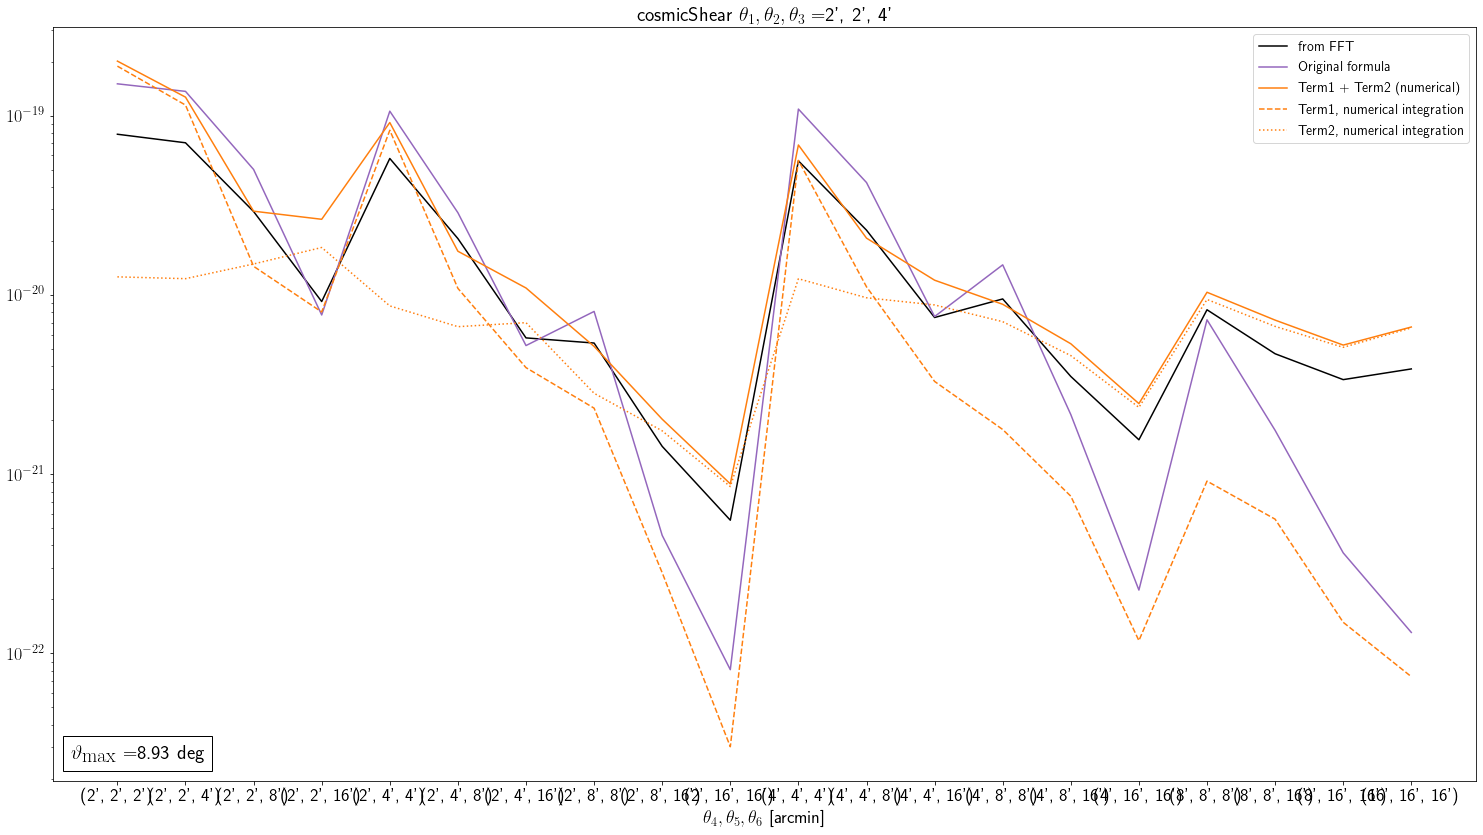

<Figure size 432x288 with 0 Axes>

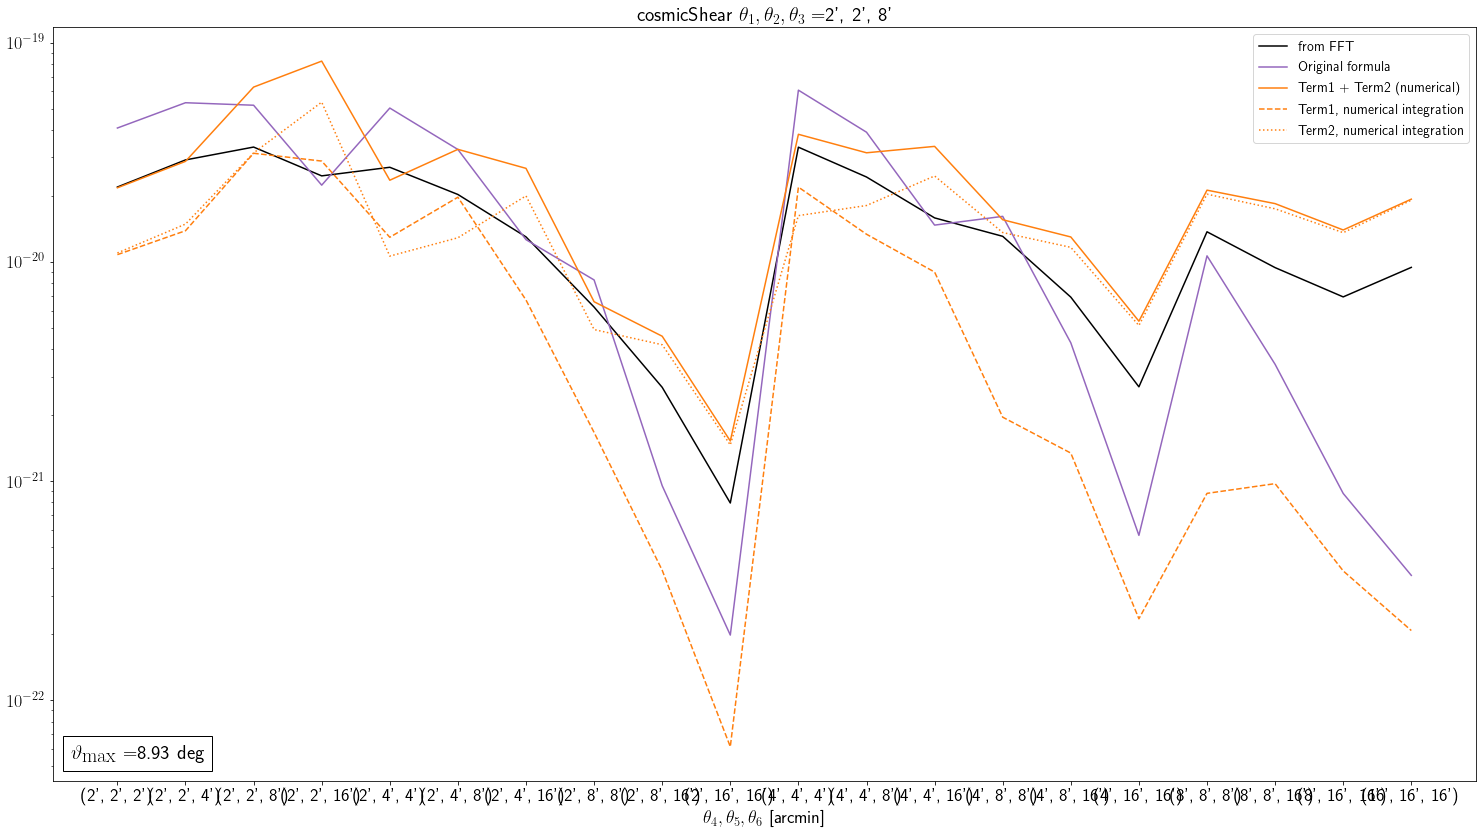

<Figure size 432x288 with 0 Axes>

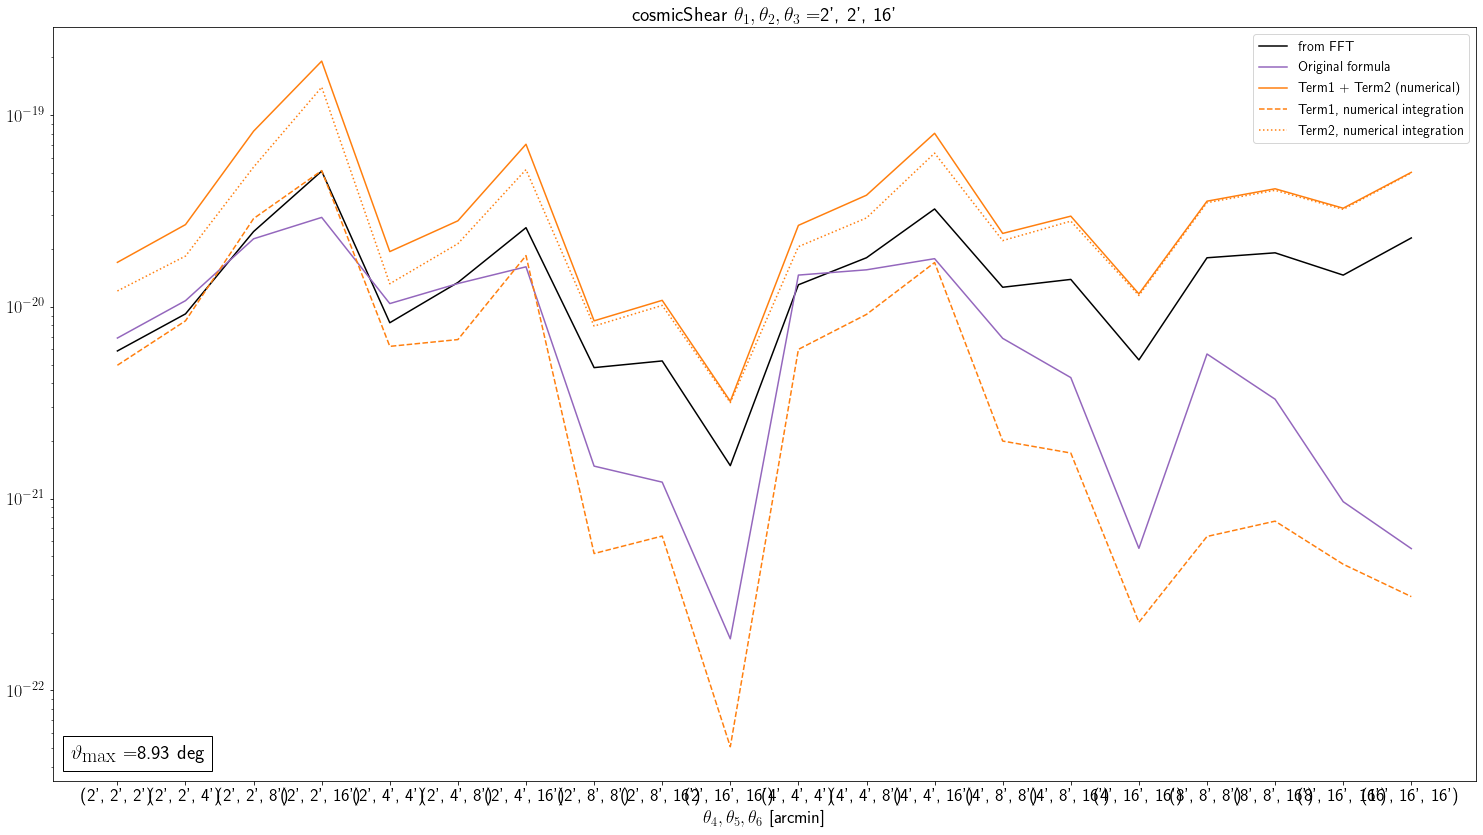

<Figure size 432x288 with 0 Axes>

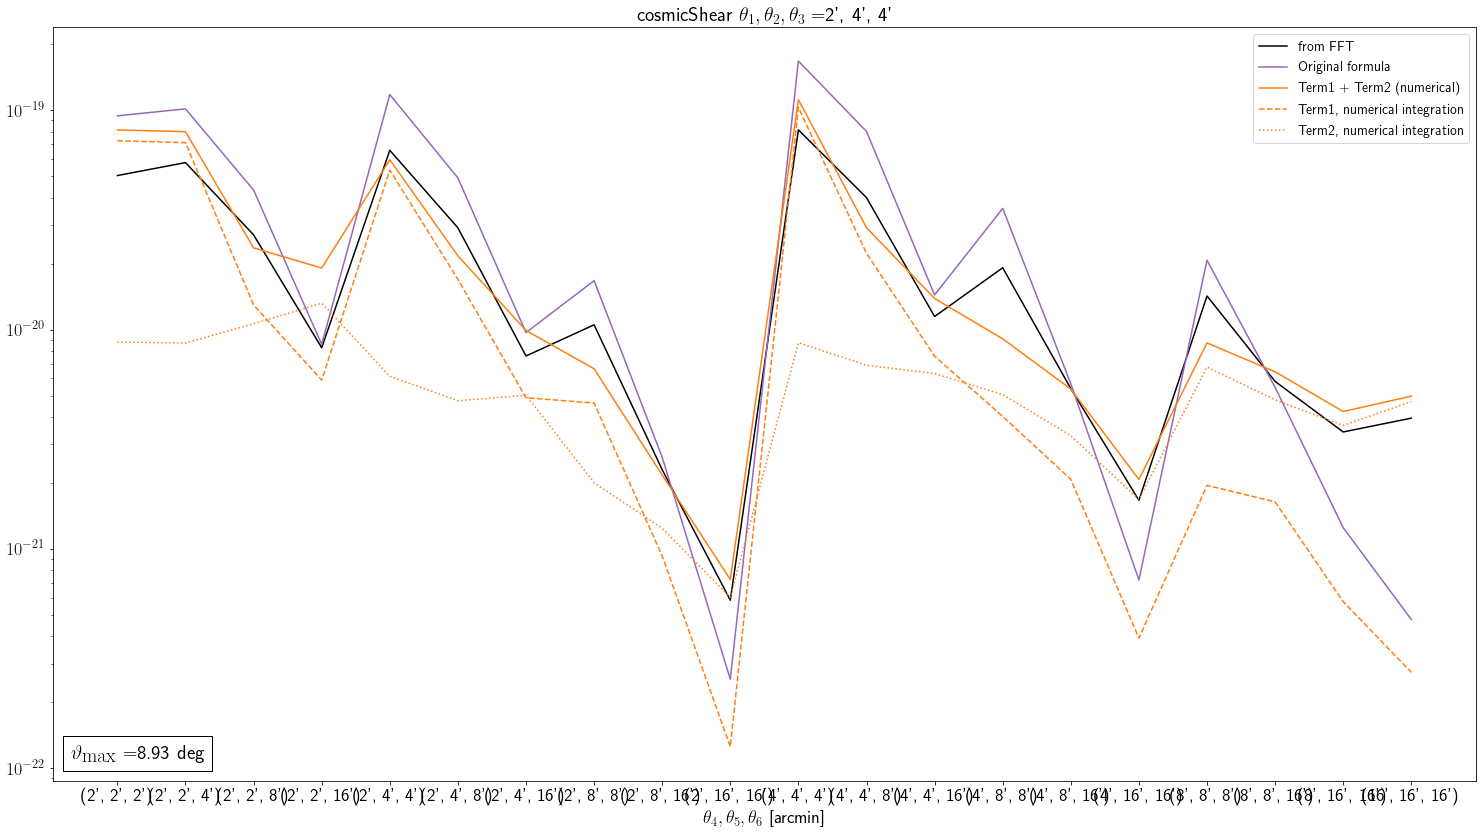

<Figure size 432x288 with 0 Axes>

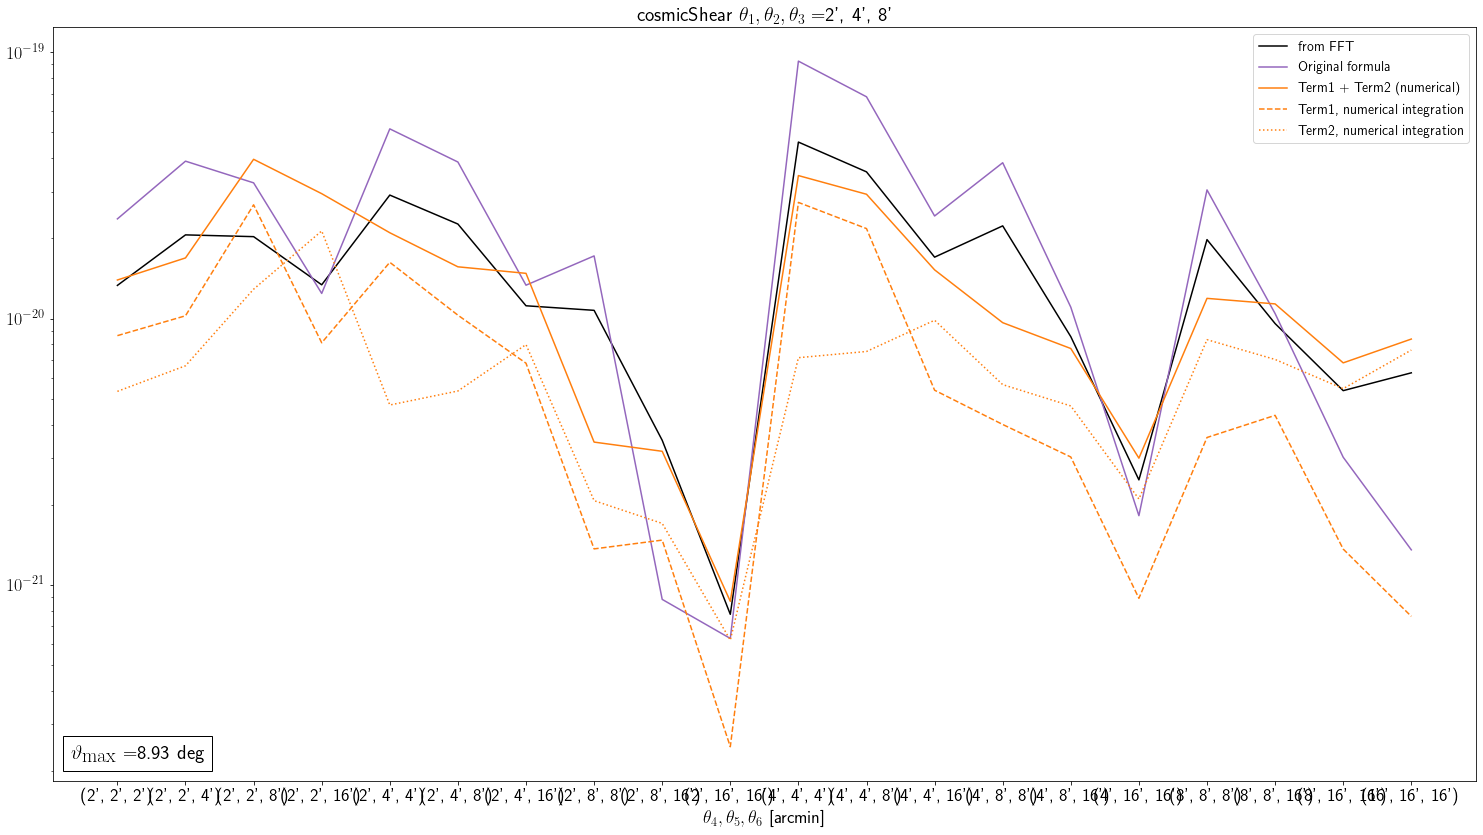

<Figure size 432x288 with 0 Axes>

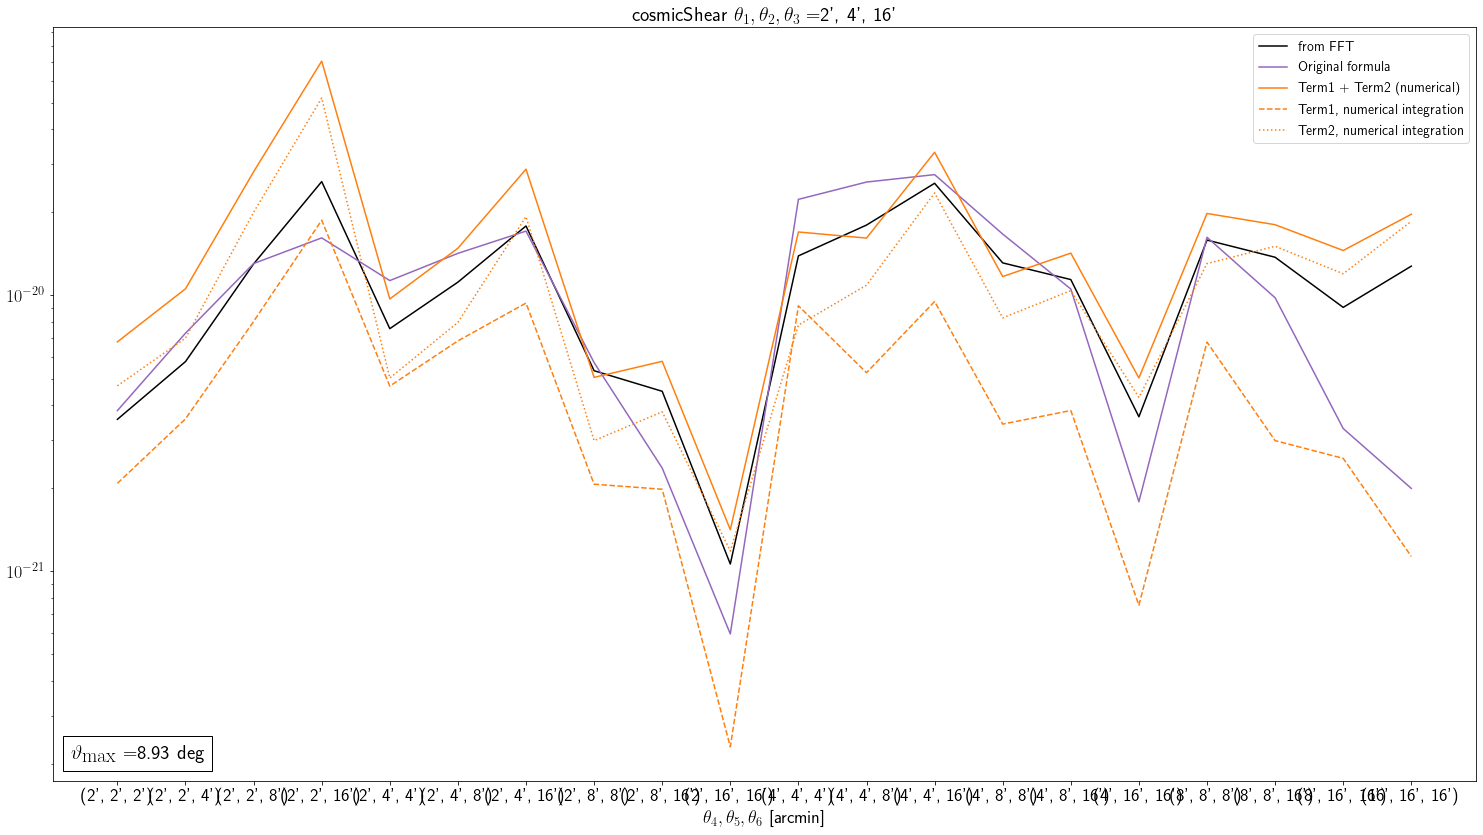

<Figure size 432x288 with 0 Axes>

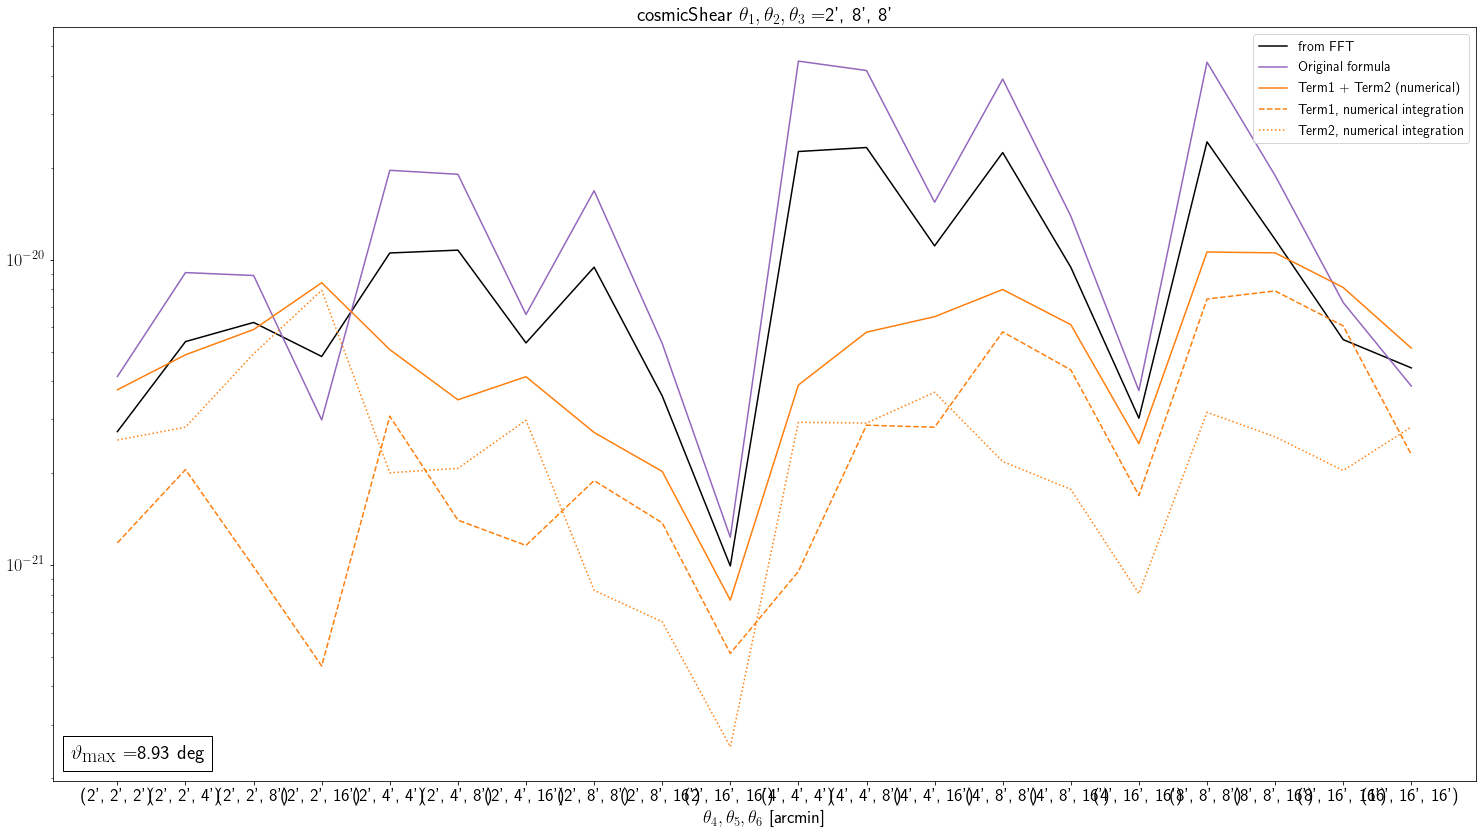

<Figure size 432x288 with 0 Axes>

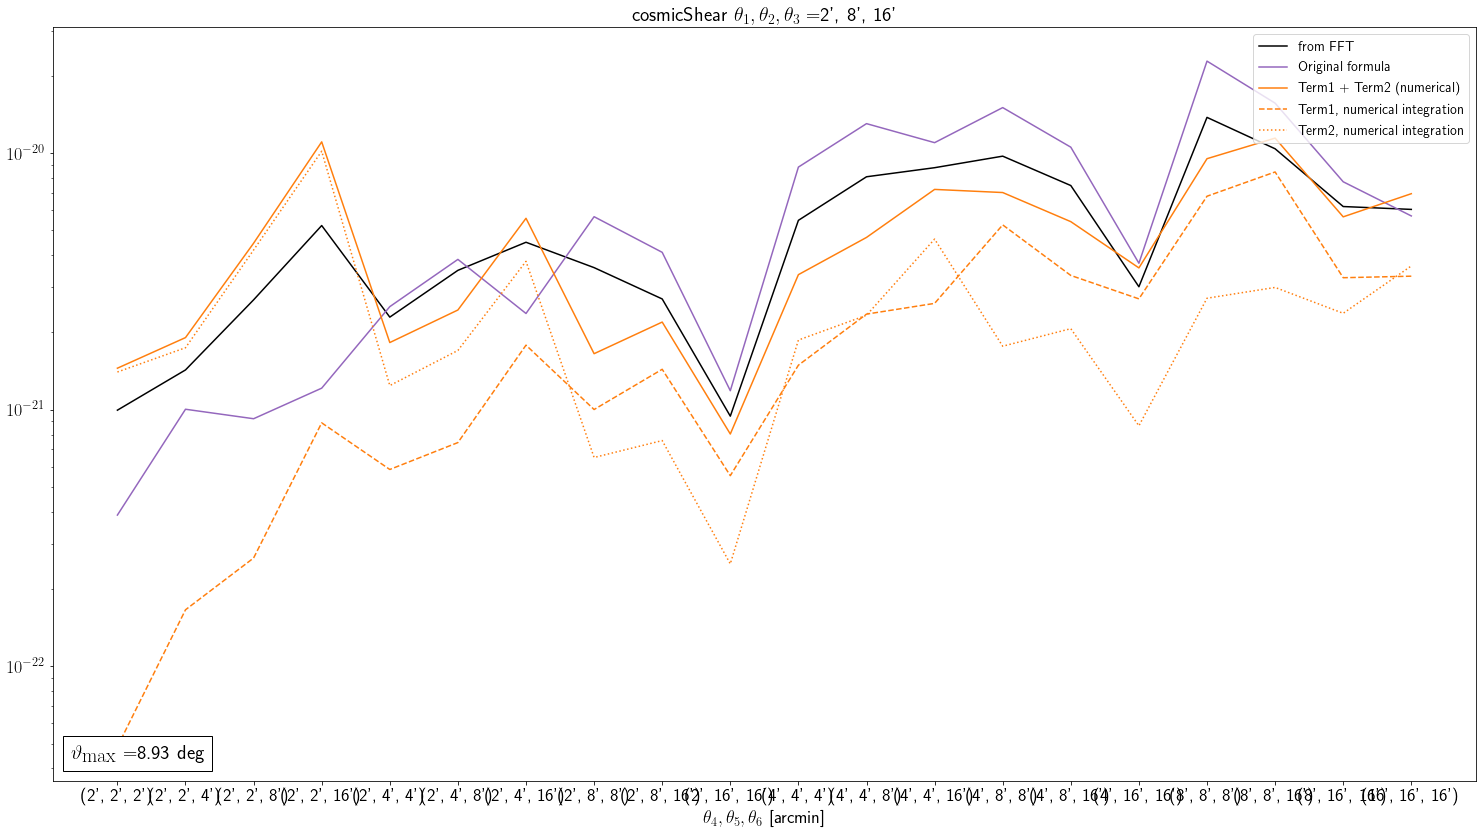

<Figure size 432x288 with 0 Axes>

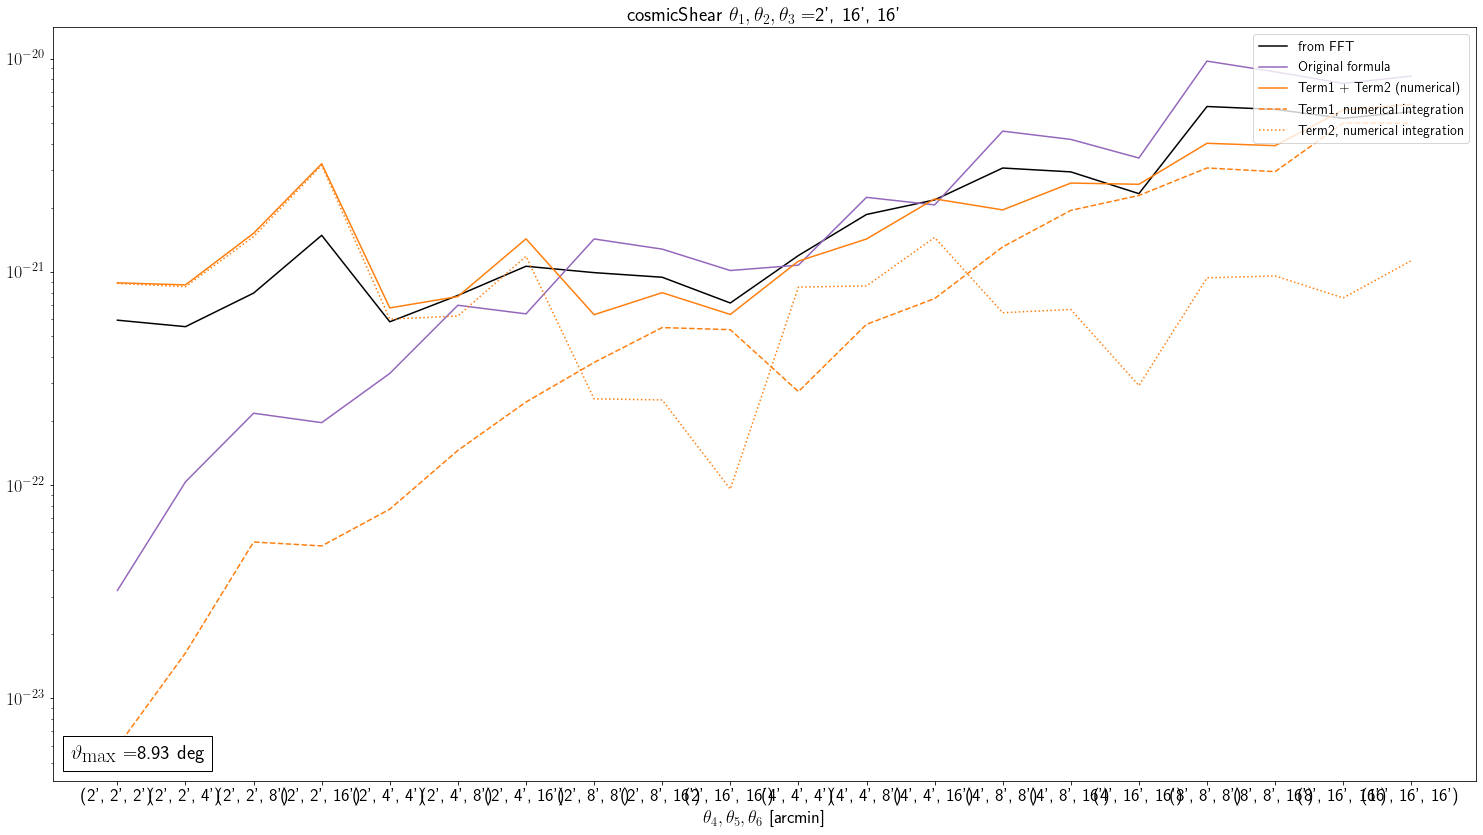

<Figure size 432x288 with 0 Axes>

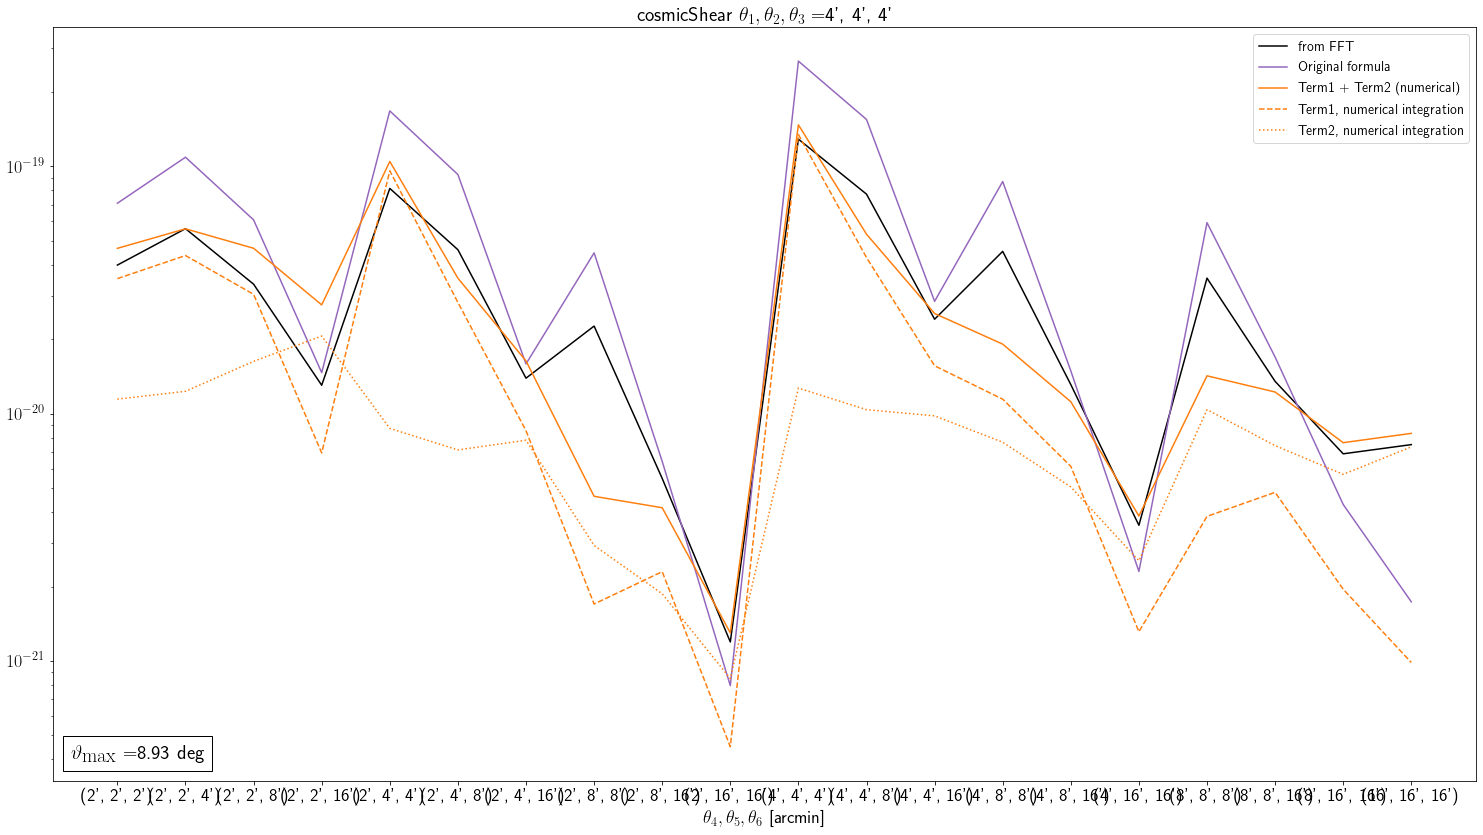

<Figure size 432x288 with 0 Axes>

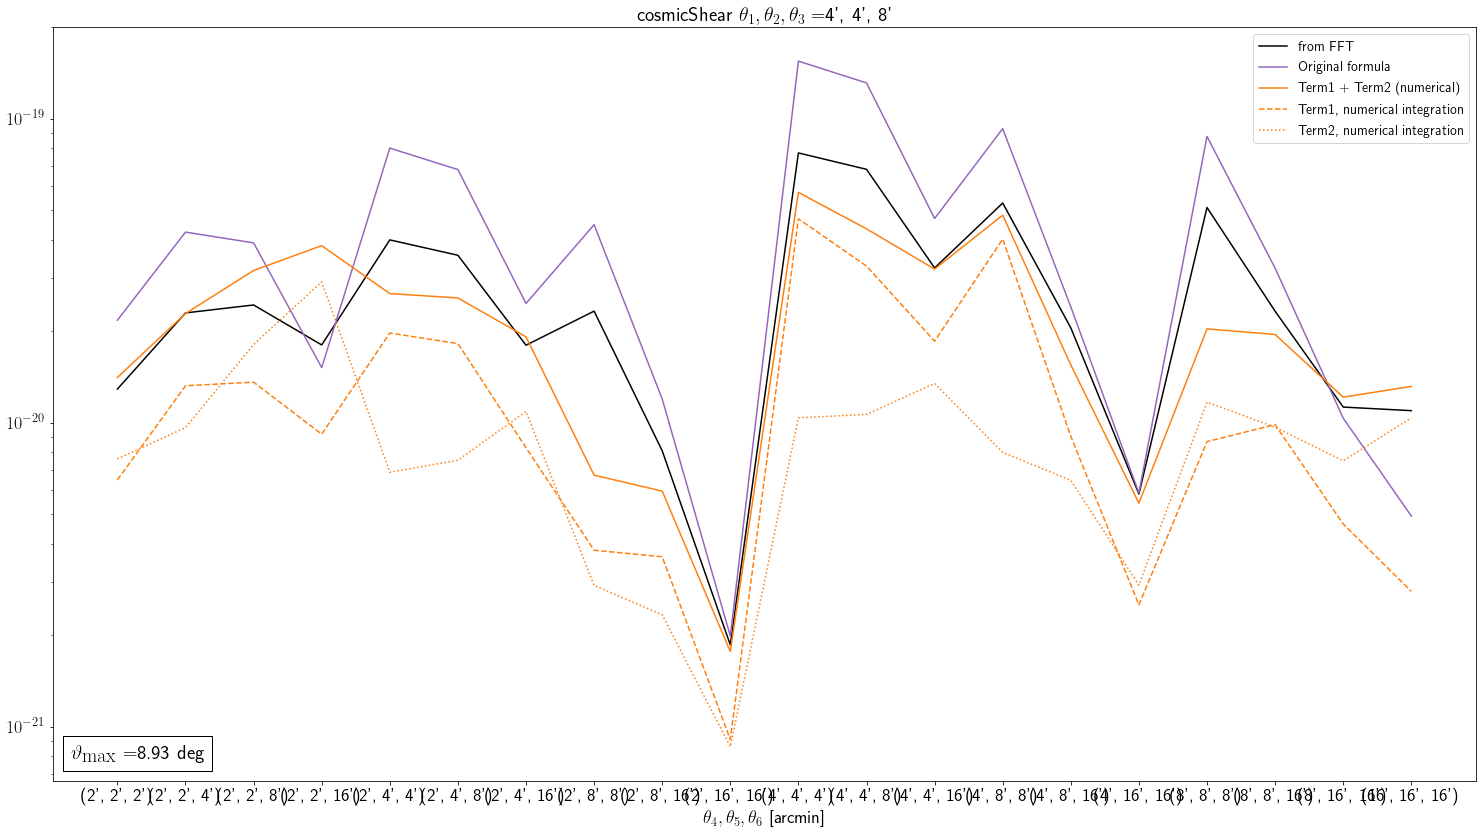

<Figure size 432x288 with 0 Axes>

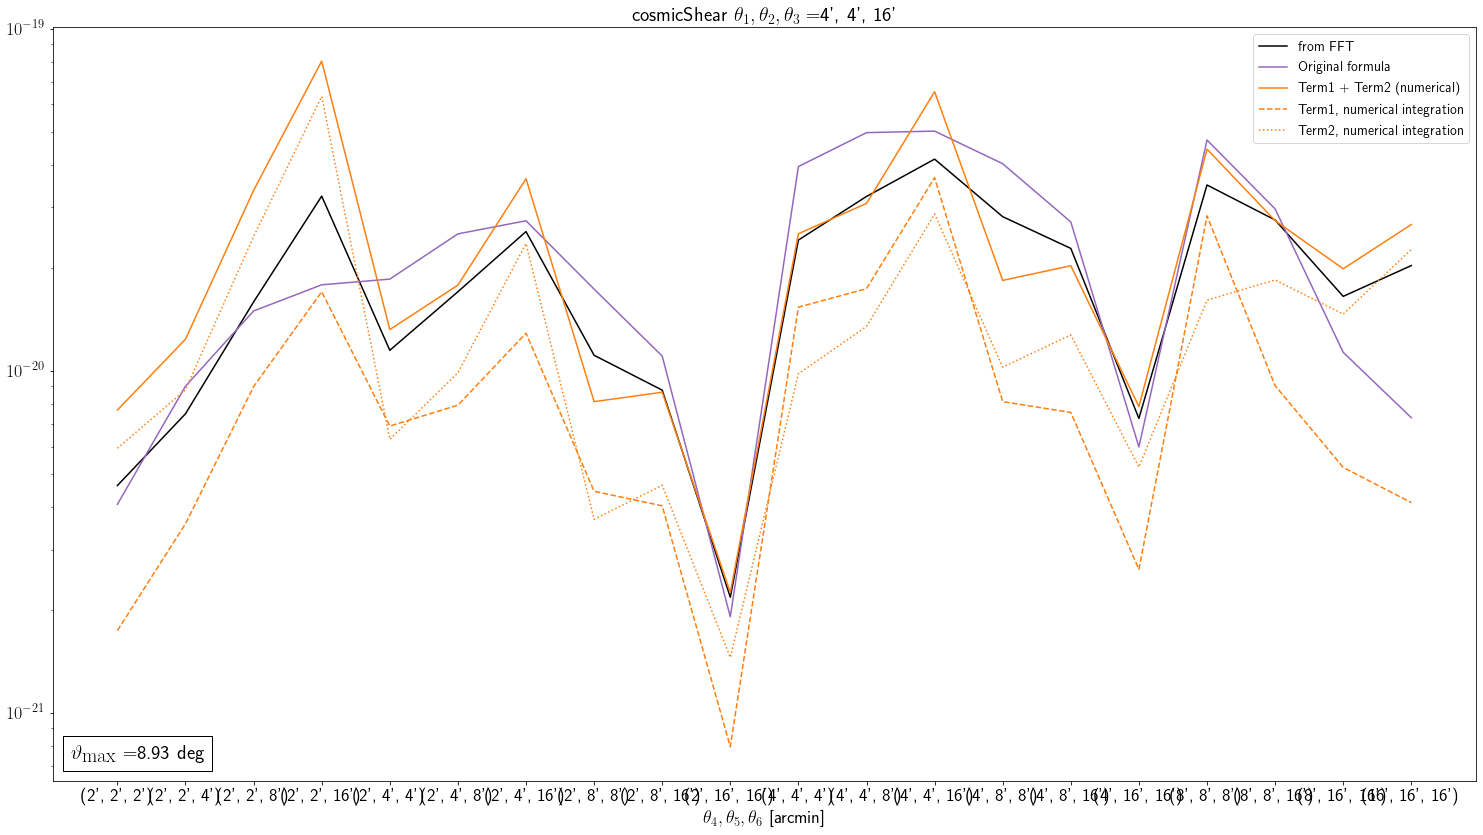

<Figure size 432x288 with 0 Axes>

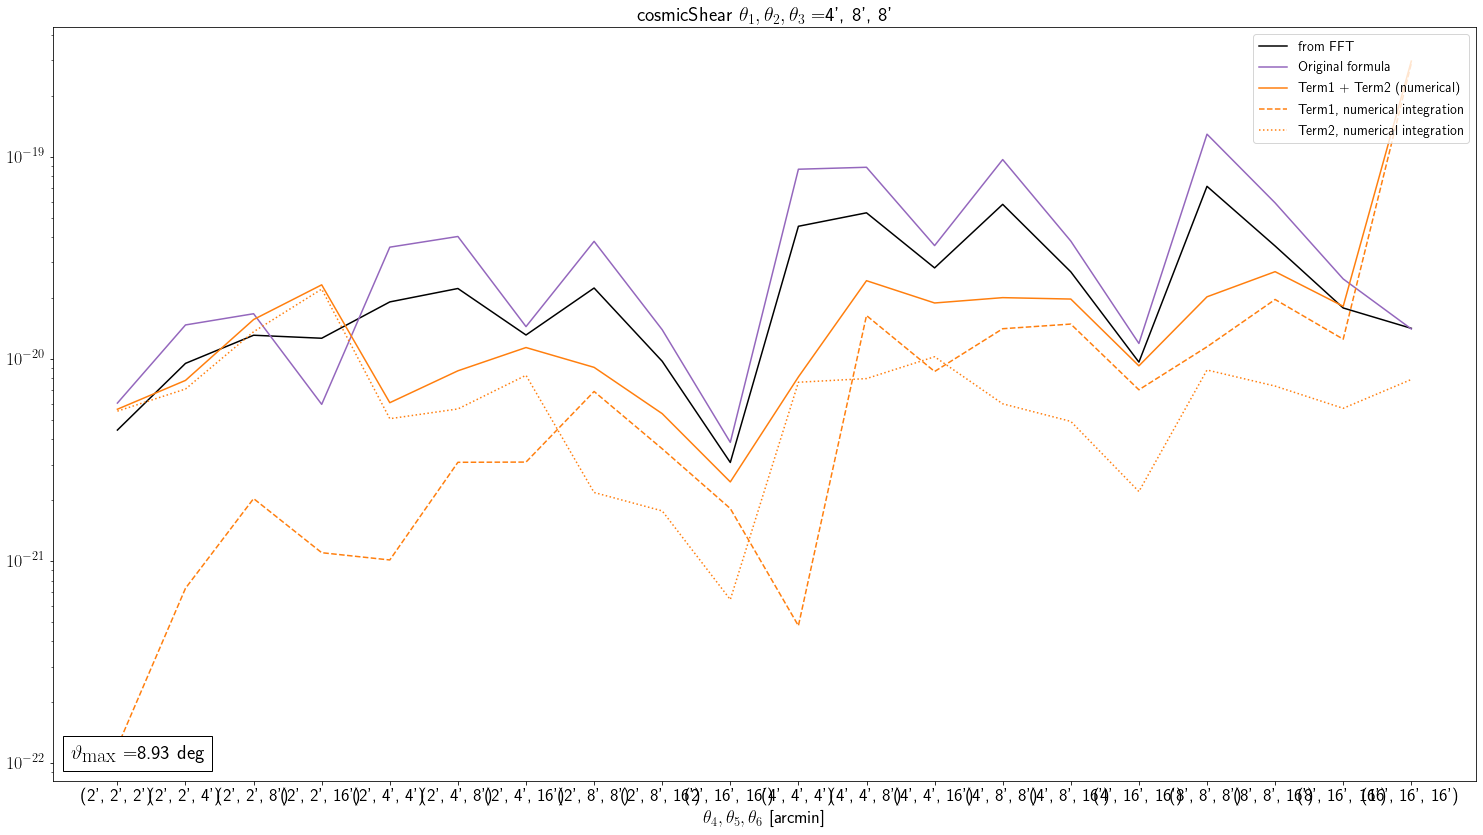

<Figure size 432x288 with 0 Axes>

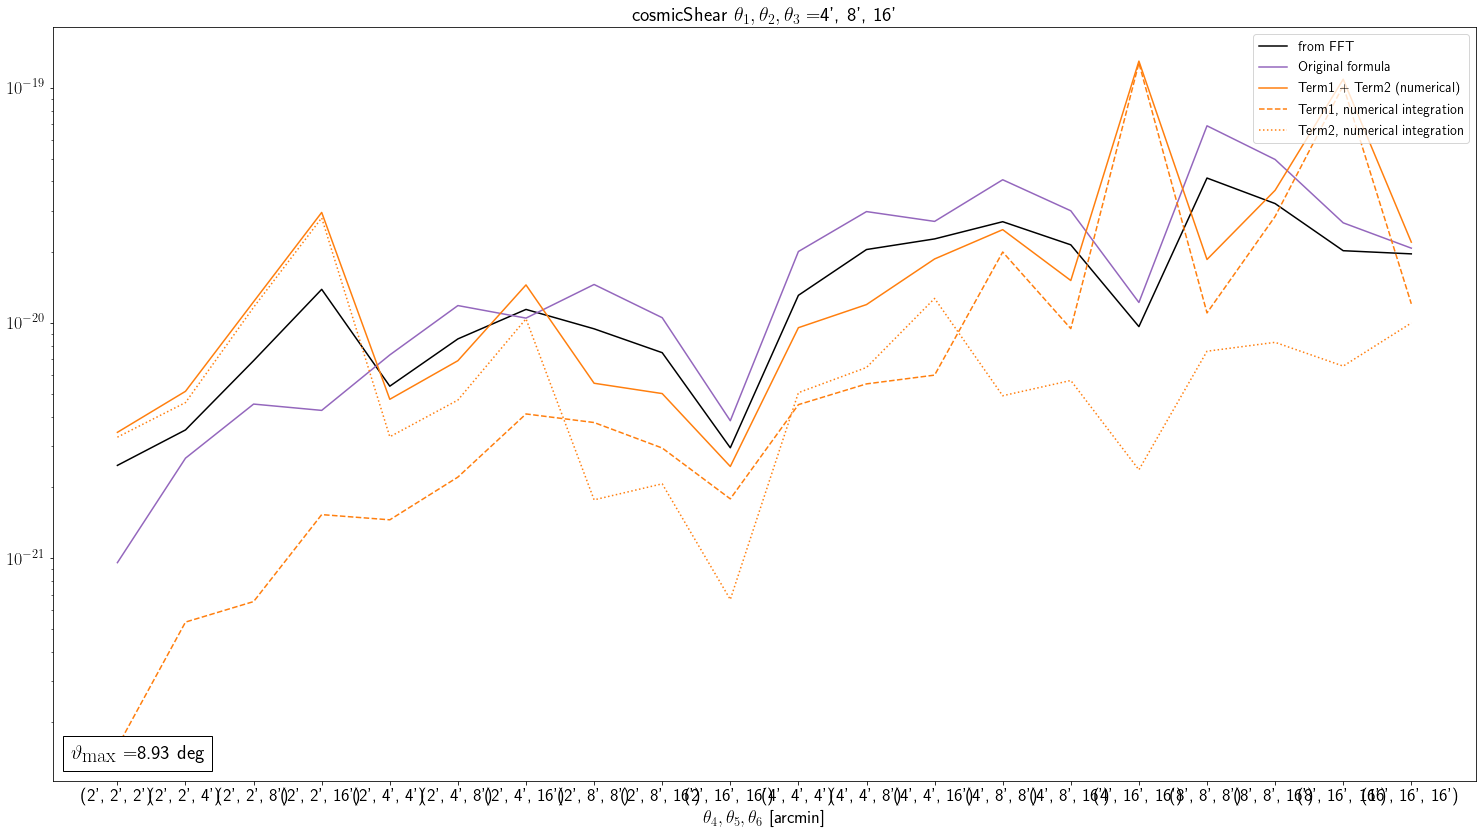

<Figure size 432x288 with 0 Axes>

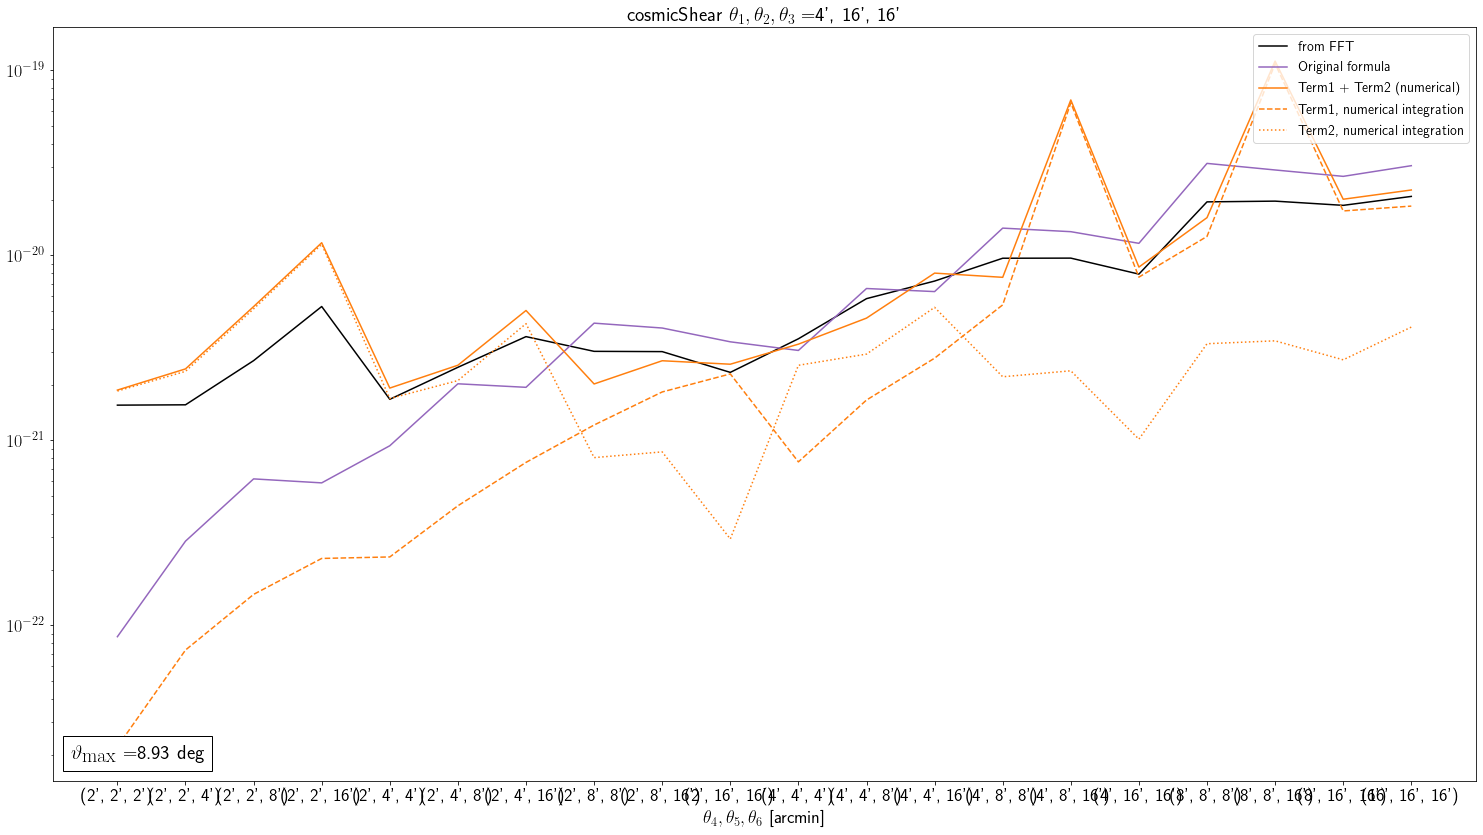

<Figure size 432x288 with 0 Axes>

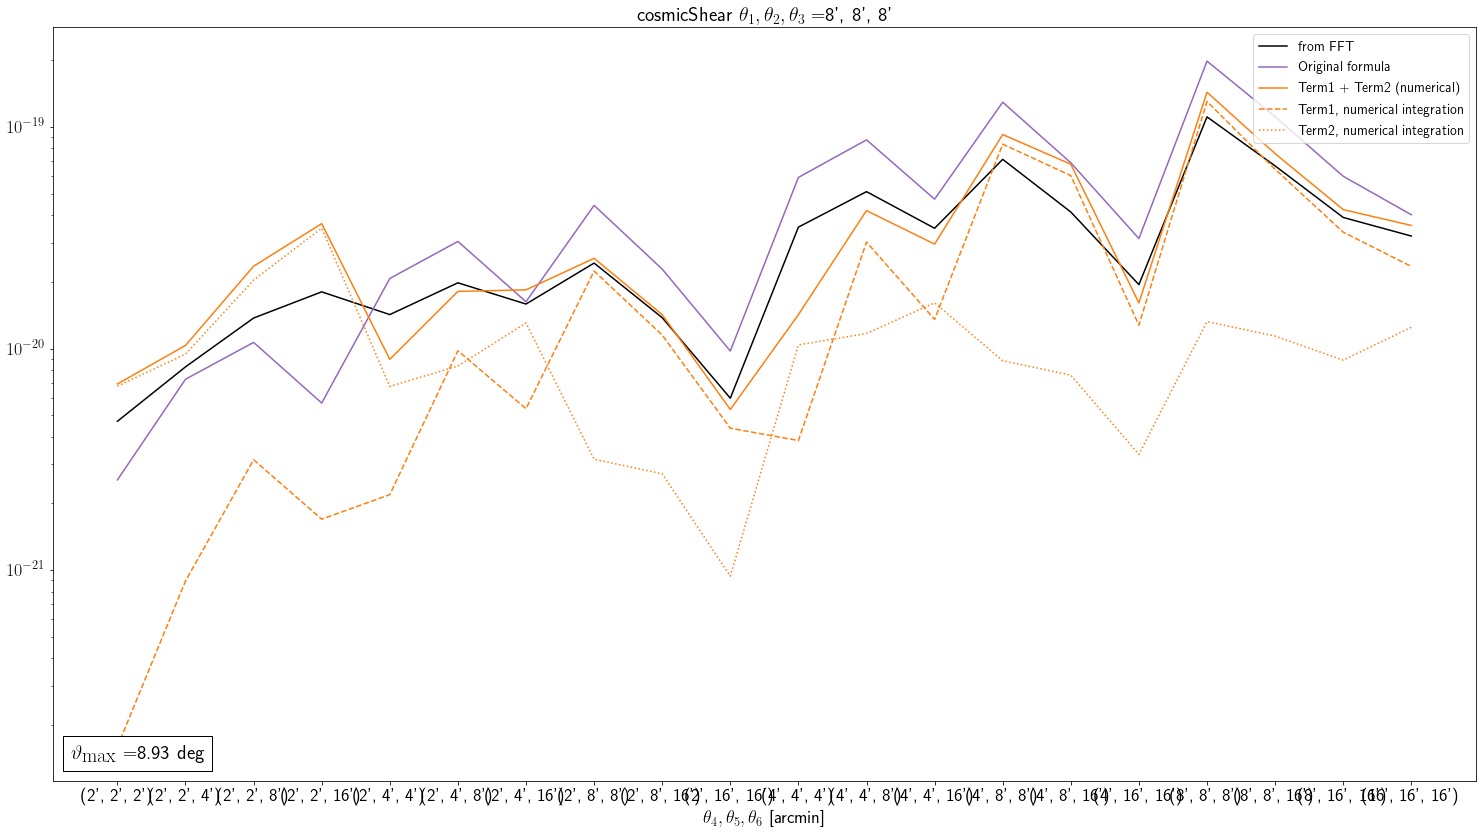

<Figure size 432x288 with 0 Axes>

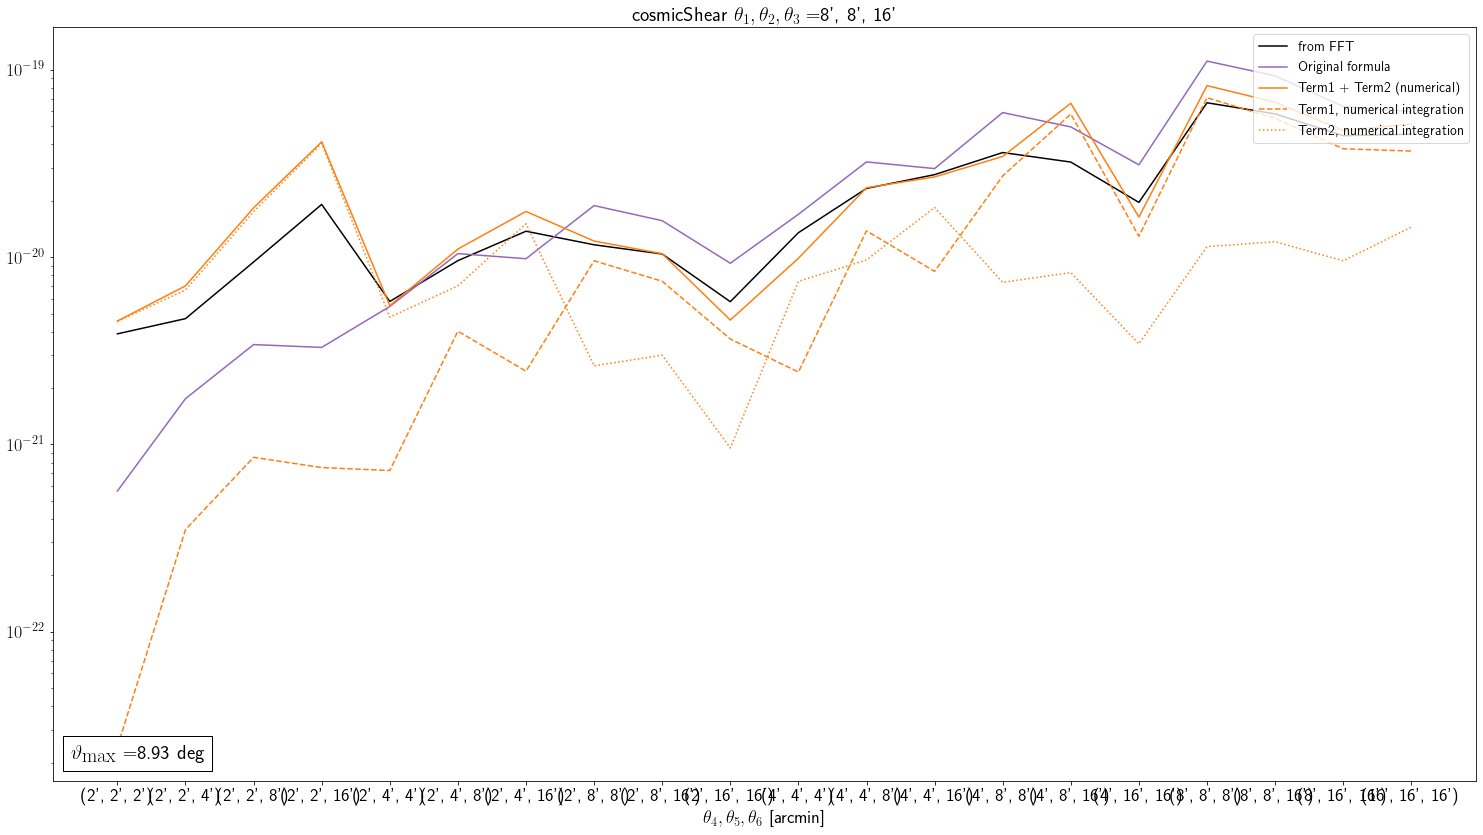

<Figure size 432x288 with 0 Axes>

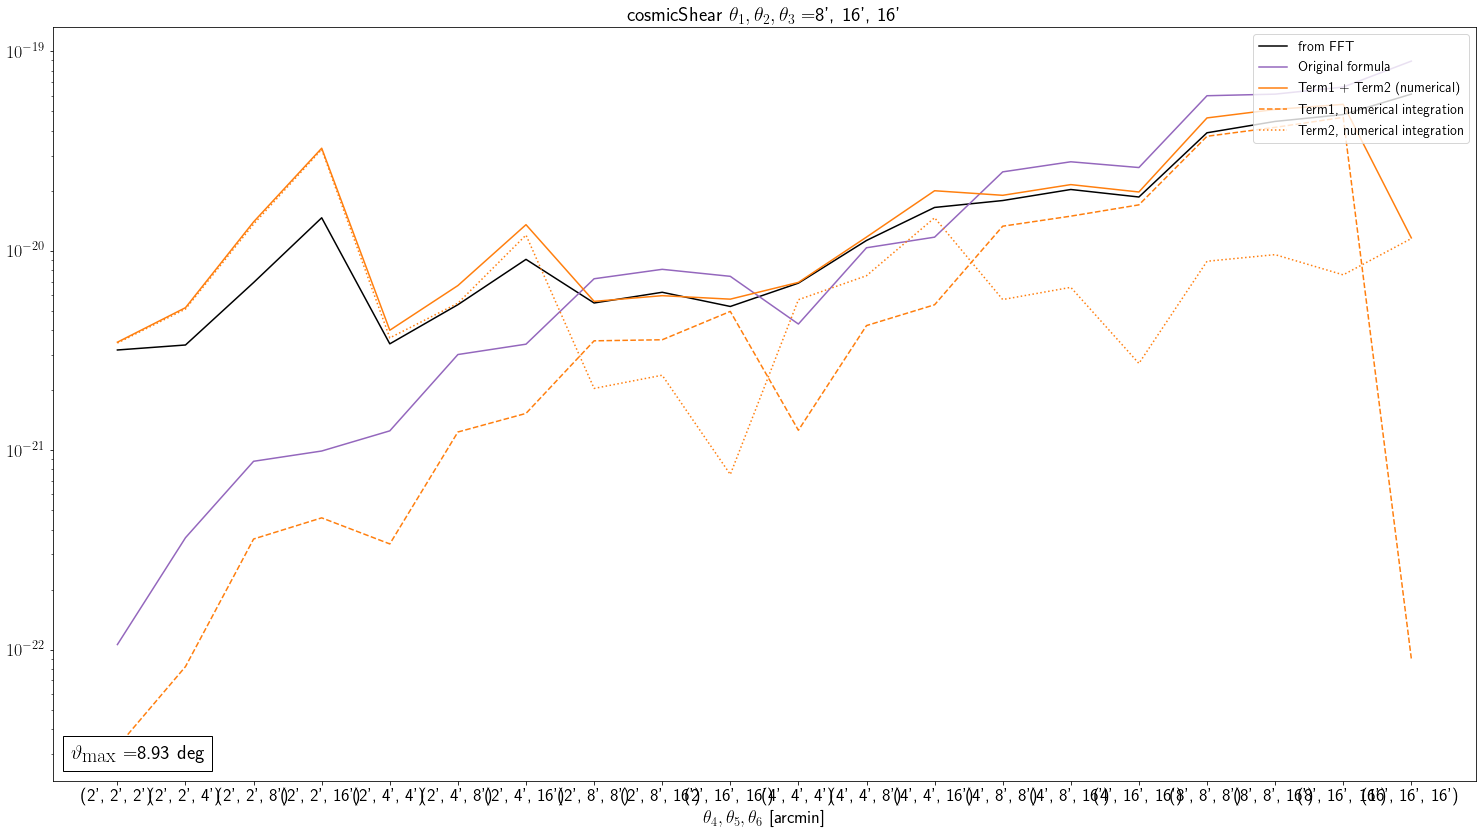

<Figure size 432x288 with 0 Axes>

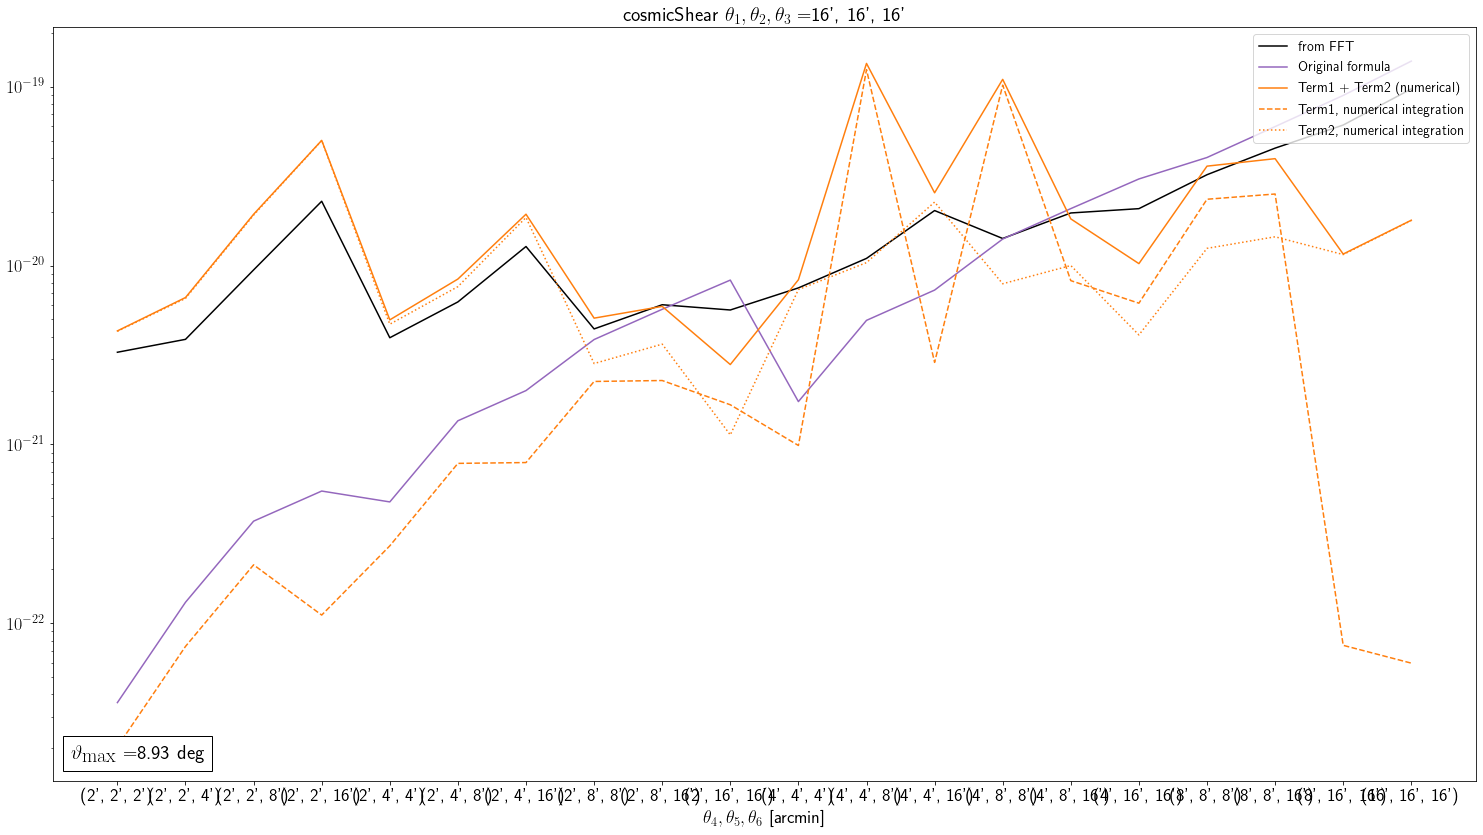

In [26]:
# Plots (single lines)

N=len(thetas_ind)
thetas_ticks=np.arange(0, N)
for i, thetas1 in enumerate(thetas_ind):
    plt.clf()
    fig, ax=plt.subplots(figsize=(21,12))
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta_4, \theta_5, \theta_6$ [arcmin]')
    ax.set_xticks(thetas_ticks)
    ax.set_xticklabels(thetas_labels)

    if(cov_type=='slics'):
        ax.plot(cov_infiniteField[i], color='xkcd:bright blue', label='Infinite Field G')
        ax.plot(cov_infiniteFieldNG[i], color='xkcd:purple', label='Infinite Field NG')
        ax.plot(cov_infiniteFieldNG[i]+cov_infiniteField[i], color='xkcd:pink', label='Infinite Field NG+G')
        
        ax.plot(cov_term2Numerical[i], color='xkcd:brick red', label='Term2, numerical integration', ls='--')

        ax.plot(cov_fft[i]/15, color='xkcd:black', label='from FFT (/15)')
        ax.plot(cov_term2Numerical[i]+cov_infiniteField[i], color='xkcd:british racing green', label='Term2 + Infinite Field G')
    elif (cov_type == 'shapenoise'):
        ax.plot(cov_fft[i], color='xkcd:black', label='from FFT')
        ax.plot(cov_infiniteField[i], color='C4', label='Original formula')
        ax.plot(cov_term2Analytical[i]+cov_infiniteField[i], color='C0', label='Term1 + Term2 (analytical)', ls='-')
        ax.plot(cov_term1Numerical[i]+cov_term2Numerical[i], color='C1', label='Term1 + Term2 (numerical)', ls='-')
        ax.plot(cov_term1Round[i]+cov_term2Round[i], color='C2', label='Term1 + Term2, round survey (numerical)', ls='-')

        ax.plot(cov_term1Analytical[i], color='C0', label='Term1, analytical', ls='--')
        ax.plot(np.arange(0,N), cov_term1Numerical[i], color='C1', label='Term1, numerical integration', ls='--')
        ax.plot(np.arange(0,N),cov_term1Round[i], color='C2', label='Term1, round (numerical)', ls='--')

        ax.plot(cov_term2Analytical[i], color='C0', label='Term2, analytical', ls=':')
        ax.plot(np.arange(0, N), cov_term2Numerical[i], color='C1', label='Term2, numerical integration', ls=':')
        ax.plot(cov_term2Round[i], color='C2', label='Term2, round (numerical)', ls=':')
    elif (cov_type == 'cosmicShear'):
        ax.plot(cov_fft[i], color='xkcd:black', label='from FFT')
        ax.plot(cov_infiniteField[i], color='C4', label='Original formula')
        
        ax.plot(cov_term1Numerical[i]+cov_term2Numerical[i], color='C1', label='Term1 + Term2 (numerical)', ls='-')
        #ax.plot(cov_term1Round[i]+cov_term2Round[i], color='C2', label='Term1 + Term2, round survey (numerical)', ls='-')

        ax.plot(np.arange(0,N), cov_term1Numerical[i], color='C1', label='Term1, numerical integration', ls='--')
        #ax.plot(np.arange(0,N),cov_term1Round[i], color='C2', label='Term1, round (numerical)', ls='--')

        ax.plot(np.arange(0, N), cov_term2Numerical[i], color='C1', label='Term2, numerical integration', ls=':')
        #ax.plot(cov_term2Round[i], color='C2', label='Term2, round (numerical)', ls=':')
    else:
        print('Cov type not specified')
    at=AnchoredText(r"$\vartheta_\textrm{max}=$"+f"{thetaMax:.2f} deg", loc='lower left')
    ax.add_artist(at)
    
    finalizePlot(ax, title=cov_type+r' $\theta_1, \theta_2, \theta_3=$'+f"{thetas1[0]}', {thetas1[1]}', {thetas1[2]}'", outputFn=folder+f"cov_{thetas1[0]}_{thetas1[1]}_{thetas1[2]}.png", loc_legend='upper right')

In [27]:
# Surface plots
import plotly.graph_objects as go
import plotly.subplots  as plotly_sp
X, Y = np.meshgrid(thetas_ticks, thetas_ticks)

layout=go.Layout(
    xaxis=dict(title=r"$\theta_1, \theta_2, \theta_3$"),
    yaxis=dict(title=r"$\theta_4, \theta_5, \theta_6$")
)

fig=go.Figure(layout=layout)

surface = go.Surface(x=X, y=Y, z=np.log(cov_term1Numerical), colorscale='Reds', name=r'log(T_1)', showscale=True)
fig.add_trace(surface)
surface = go.Surface(x=X, y=Y, z=np.log(cov_term2Numerical), colorscale='Blues', name=r'log(T_2)', showscale=False)
fig.add_trace(surface)
fig.write_html("T1_T2.html")




fig.show(showlegend=True)

fig=go.Figure()
surface = go.Surface(x=X, y=Y, z=np.log(cov_fft), colorscale='Greens', name=r'log(<M³ M³>_meas)', showscale=True)
fig.add_trace(surface)
surface = go.Surface(x=X, y=Y, z=np.log(cov_term1Numerical+cov_term2Numerical), colorscale='Purples', name=r'log(T_1+T_2)', showscale=True)
fig.add_trace(surface)
fig.show()

fig.write_html("T1+T2_GRF.html")


#plt.show()

<ipython-input-28-968ff0c1f78a>:51: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



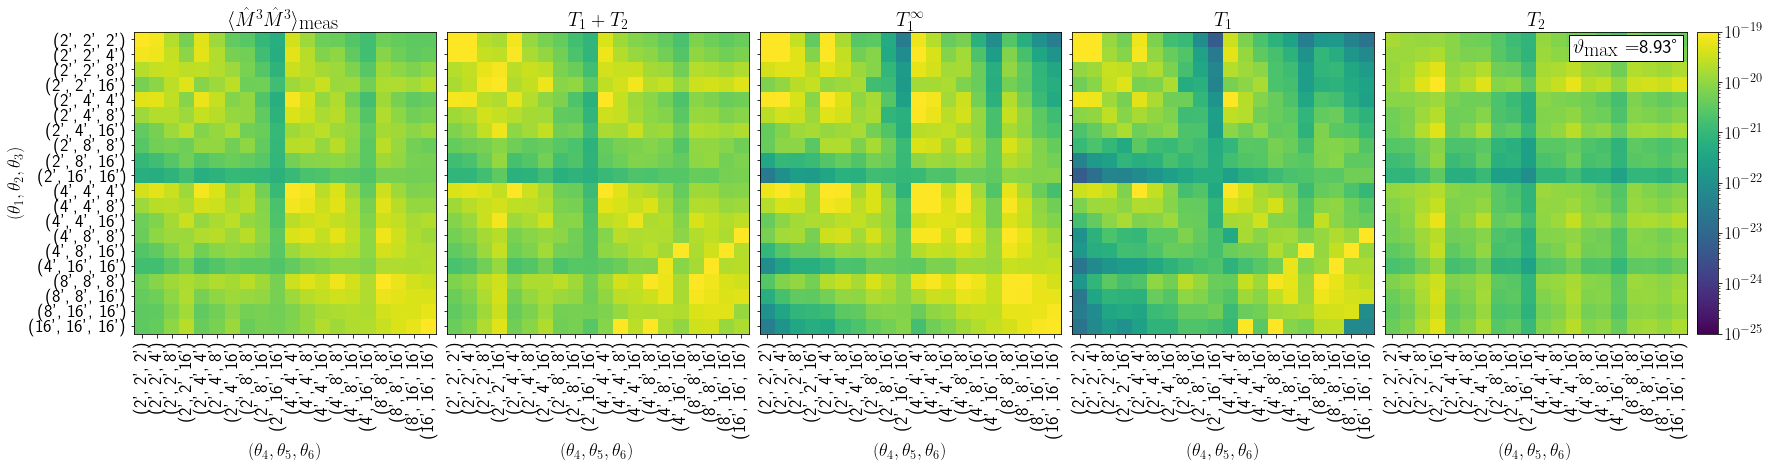

In [28]:
# Heatmaps

fig= plt.figure(figsize=(25, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

grid[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[1].set_xticks(thetas_ticks)
grid[1].set_xticklabels(thetas_labels, rotation=90)

grid[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[2].set_xticks(thetas_ticks)
grid[2].set_xticklabels(thetas_labels, rotation=90)

grid[3].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[3].set_xticks(thetas_ticks)
grid[3].set_xticklabels(thetas_labels, rotation=90)

grid[4].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[4].set_xticks(thetas_ticks)
grid[4].set_xticklabels(thetas_labels, rotation=90)

grid[0].set_title(r"$\langle\hat{M}^3\hat{M}^3 \rangle_\textrm{meas} $")
im = grid[0].imshow(cov_fft, norm=LogNorm(vmin=1e-25, vmax=1e-19))  

grid[1].set_title(r"$T_1+T_2$")     
im = grid[1].imshow(cov_term1Numerical+cov_term2Numerical, norm=LogNorm(vmin=1e-25, vmax=1e-19)) 

grid[2].set_title(r"$T^\infty_1$")     
im = grid[2].imshow(cov_infiniteField, norm=LogNorm(vmin=1e-25, vmax=1e-19))  

grid[3].set_title(r"$T_1$")  
im = grid[3].imshow(cov_term1Numerical, norm=LogNorm(vmin=1e-25, vmax=1e-19))    
grid[4].set_title(r"$T_2$")  
im = grid[4].imshow(cov_term2Numerical, norm=LogNorm(vmin=1e-25, vmax=1e-19)) 


grid[4].text(19, 0, r"$\vartheta_\textrm{max}=$"+f"{thetaMax}°", verticalalignment='top', horizontalalignment='right',bbox=dict(facecolor='white', alpha=1))  

grid[4].cax.cla()
mcb.Colorbar(grid[4].cax, im)

plt.tight_layout()
plt.savefig(folder+f"all_covs_thetaMax_{thetaMax}.png", facecolor="white", dpi=300)
plt.show()

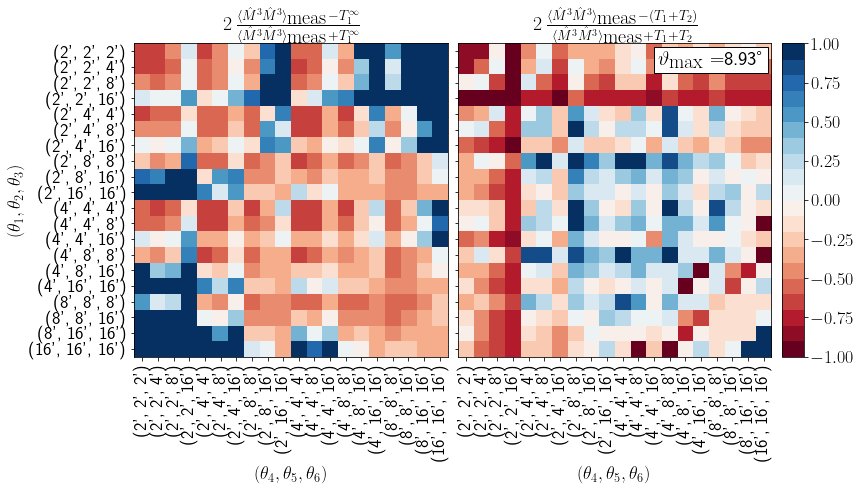

In [29]:
#Heatmaps of differences

diff_infinite=2*(cov_fft-cov_infiniteField)/(cov_fft+cov_infiniteField)
diff_finite=2*(cov_fft-(cov_term1Numerical+cov_term2Numerical))/(cov_fft+cov_term1Numerical+cov_term2Numerical)
diff_infinite=0.5*(diff_infinite+diff_infinite.transpose())
diff_finite=0.5*(diff_finite+diff_finite.transpose())

fig= plt.figure(figsize=(12, 10))
cmap=cm.get_cmap('RdBu', 20)
grid=ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

grid[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[1].set_xticks(thetas_ticks)
grid[1].set_xticklabels(thetas_labels, rotation=90)

grid[0].set_title(r"$2\,\frac{\langle\hat{M}^3\hat{M}^3 \rangle_\textrm{meas}-T^\infty_1}{\langle\hat{M}^3\hat{M}^3 \rangle_\textrm{meas} + T_1^\infty}$")
im = grid[0].imshow(diff_infinite, vmin=-1, vmax=1, cmap=cmap)  

grid[1].set_title(r"$2\,\frac{\langle\hat{M}^3\hat{M}^3 \rangle_\textrm{meas}-(T_1+T_2)}{\langle\hat{M}^3\hat{M}^3 \rangle_\textrm{meas} + T_1+T_2}$")
im = grid[1].imshow(diff_finite, vmin=-1, vmax=1, cmap=cmap)  
grid[1].text(19, 0, r"$\vartheta_\textrm{max}=$"+f"{thetaMax}°", verticalalignment='top', horizontalalignment='right',bbox=dict(facecolor='white', alpha=1))  



grid[1].cax.cla()
mcb.Colorbar(grid[1].cax, im)

plt.savefig(folder+f"diffs_covs_thetaMax_{thetaMax}.png", facecolor="white", dpi=300)

In [ ]:
# Various thetaMaxs

# thetaMaxs=np.array([1.43, 2.93, 8.93, 18.93, 38.93])
thetaMaxs=np.array([2.93, 8.93, 13.93, 18.93])
NthetaMax=len(thetaMaxs)


# load data
covs_term1=np.zeros((N, N, NthetaMax))
covs_term2=np.zeros((N, N, NthetaMax))
covs_infinite=np.zeros((N, N, NthetaMax))

for i, thetaMax in enumerate(thetaMaxs):
    covs_term1[:,:,i] = np.loadtxt(folder+f'cov_shapenoise_term1Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')*1.1
    covs_term2[:,:,i]= np.loadtxt(folder+f'cov_shapenoise_term2Numerical_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')
    covs_infinite[:,:,i] = np.loadtxt(folder+f'cov_shapenoise_infiniteField_sigma_{sigma}_n_{n}_thetaMax_{thetaMax}.dat')

# calculate values
fraction_T2 = covs_term2/(covs_term1+covs_term2)
diff_T1 = 2*(covs_term1-covs_infinite)/(covs_term1+covs_infinite)


# plots

fig= plt.figure(figsize=(NthetaMax*5+2, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(2, (NthetaMax+1)//2), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
cmap=cm.get_cmap('inferno', 10)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

for i, thetaMax in enumerate(thetaMaxs):
    grid[i].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
    grid[i].set_xticks(thetas_ticks)
    grid[i].set_xticklabels(thetas_labels, rotation=90)

    grid[i].text(19, 0, r"$\vartheta_\textrm{max}=$"+f"{thetaMax}°", verticalalignment='top', horizontalalignment='right',bbox=dict(facecolor='white', alpha=1))  
    im = grid[i].imshow(fraction_T2[:,:,i], vmin=0, vmax=1, cmap=cmap)  

grid[0].cax.cla()
cb = mcb.Colorbar(grid[0].cax, im)
cb.set_label(r"$\frac{T_2}{T_1+T_2}$", fontsize=25)

plt.tight_layout()
plt.savefig(folder+f"fractionT2_variousAreas.png", facecolor="white", dpi=300)
plt.show()


fig= plt.figure(figsize=(NthetaMax*5+2, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(2, (NthetaMax+1)//2), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
cmap=cm.get_cmap('RdBu', 20)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

for i, thetaMax in enumerate(thetaMaxs):
    grid[i].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
    grid[i].set_xticks(thetas_ticks)
    grid[i].set_xticklabels(thetas_labels, rotation=90)

    grid[i].text(19, 0, r"$\vartheta_\textrm{max}=$"+f"{thetaMax}°", verticalalignment='top', horizontalalignment='right',bbox=dict(facecolor='white', alpha=1))  
    im = grid[i].imshow(0.5*diff_T1[:,:,i]+0.5*diff_T1[:,:,i].transpose(), vmin=-1, vmax=1, cmap=cmap)  

grid[0].cax.cla()
cb = mcb.Colorbar(grid[0].cax, im)
cb.set_label(r"$2\frac{T_1-T_1^\infty}{T_1 + T_1^\infty}$", fontsize=25)

plt.tight_layout()
plt.savefig(folder+f"T1_variousAreas.png", facecolor="white", dpi=300)
plt.show()
